<a href="https://colab.research.google.com/github/bvanitsthian/photocircle_nlp/blob/main/circles_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [ ]:
nltk.download('punkt')

In [ ]:
nltk.download('stopwords')

In [ ]:
pip install wordcloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PhotoCircle/photocircle.csv')

In [ ]:
data.head()

,circle_uuid,user_uuid,media_added_count_x,title,media_count,has_greek_words,real_estate_keywords,is_real_estate,solar_keywords,is_solar,...,is_location,display_name,email_domain,active_count_in_last_30_days,media_added_count_y,first_name,num_female,num_male,female_pct,is_student
0,00005962-836d-d551-c07b-5c2040500002,00000000-575c-c42a-d551-c018b1942652,96,Georgia Jean Williams,160.0,False,[],False,[],False,...,False,Darwin Williams,stthomas.edu,6.0,15.0,Darwin,83.0,24680.0,0.34,True
1,00005bfc-e475-d551-c026-3d658eab0002,4d4f4f68-feff-4490-bd45-ae90ba4acdbf,6,Tri Delta,12235.0,True,[],False,[],False,...,False,tara ghimenti,gmail.com,0.0,0.0,tara,0.0,0.0,50.00,False
2,55a82813-15c0-4faf-897d-d04803036af0,c31e9b29-bf13-4493-a017-54d531d51d7b,31,Vegas 2022,31.0,False,[],False,[],False,...,False,Brenda Yorks,privaterelay.appleid.com,0.0,0.0,Brenda,607096.0,2121.0,99.65,False
3,0000594a-f3f4-d551-c011-88e3b4ad0002,00000000-594a-f5ce-d551-c01188e3c8cb,8,WALK,587.0,False,[],False,[],False,...,False,Rebekah Farnham,gmail.com,0.0,0.0,Rebekah,73511.0,119.0,99.84,False
4,fc66e54c-8e12-4387-9579-be35b6f3d8ab,eebe45c6-66fb-4e86-9f39-c55f55d98c95,72,❤ Eric Hazen ❤,466.0,False,[],False,[],False,...,False,Cindy,live.com,0.0,0.0,Cindy,256399.0,770.0,99.70,False


In [ ]:
data['title'] = data['title'].str.lower()

In [ ]:
grouped_data = data.groupby('circle_uuid')

In [ ]:
unique_title = grouped_data['title']

In [ ]:
len(unique_title)

2042587

In [ ]:
unique_title.head()

0                           georgia jean williams
1                                       tri delta
2                                      vegas 2022
3                                            walk
4                                 ❤ eric hazen  ❤
                            ...                  
10578714                         six flags 5/2021
10578718                          santa cruz 7/13
10578725                                tutorials
10578726    247 days old monday mahara 07/11/2022
10578740                            daniel bowers
Name: title, Length: 5921872, dtype: object

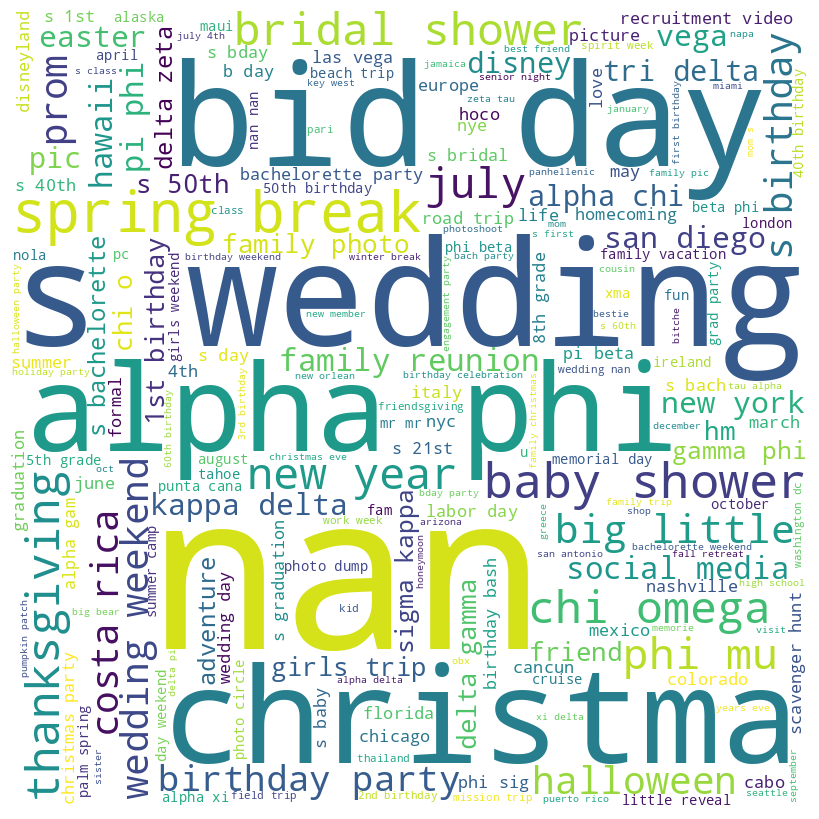

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data['title'].astype(str))
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [100]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [101]:
sampled_data = resample(data, n_samples=100000, random_state=42)

In [102]:
sampled_data['title'] = sampled_data['title'].astype(str) 
cleaned_title = sampled_data['title'].apply(lambda x: x.lower())  
tokenized_title = cleaned_title.str.split()
vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(tokenized_title.apply(lambda x: ' '.join(x)))

In [103]:
num_topics = 10  
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(document_term_matrix)

LatentDirichletAllocation(random_state=42)

In [104]:
feature_names = vectorizer.get_feature_names_out()
topic_keywords = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_word_indices = topic.argsort()[:-6:-1]  # Get the indices of the top 5 keywords
    top_words = [feature_names[index] for index in top_word_indices]
    topic_keywords.append(', '.join(top_words))

topic_keywords

['2021, trip, 2022, christmas, bday',
 'the, bachelorette, lake, of, 2019',
 'day, pics, phi, alpha, 2022',
 '2018, 2017, 2015, 2023, kappa',
 'wedding, and, birthday, party, graduation',
 'spring, 2022, 2019, baby, of',
 '22, 23, 21, 10, 2021',
 '2022, nan, summer, camp, 2021',
 '2020, family, photos, san, fun',
 'weekend, chi, 19, girls, photo']

In [105]:
topic_distribution = lda_model.transform(document_term_matrix)
topic_labels = ['Topic ' + str(i) for i in range(num_topics)]
topic_counts = pd.DataFrame(topic_distribution, columns=topic_labels)
topic_counts['Dominant Topic'] = topic_distribution.argmax(axis=1)
topic_counts['Dominant Topic'] = topic_counts['Dominant Topic'].apply(lambda x: topic_labels[x])

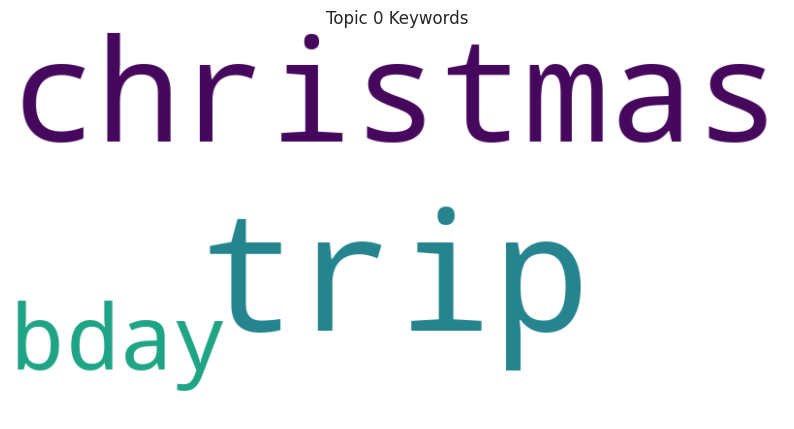

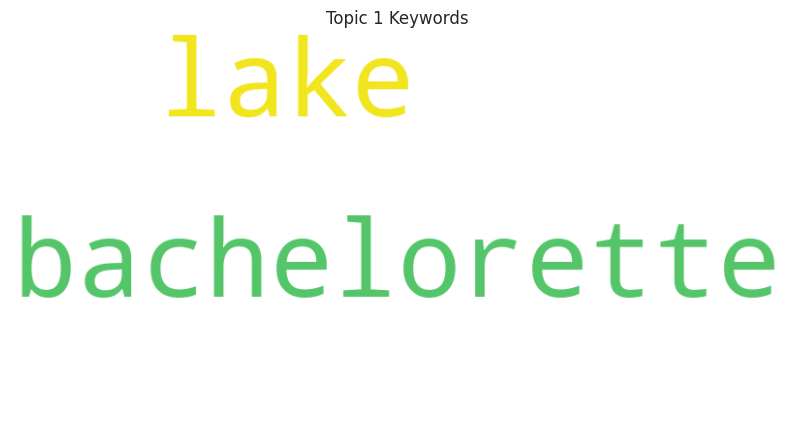

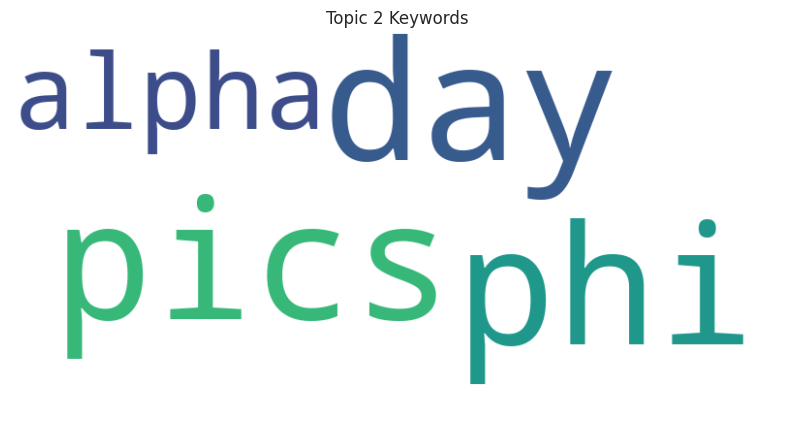

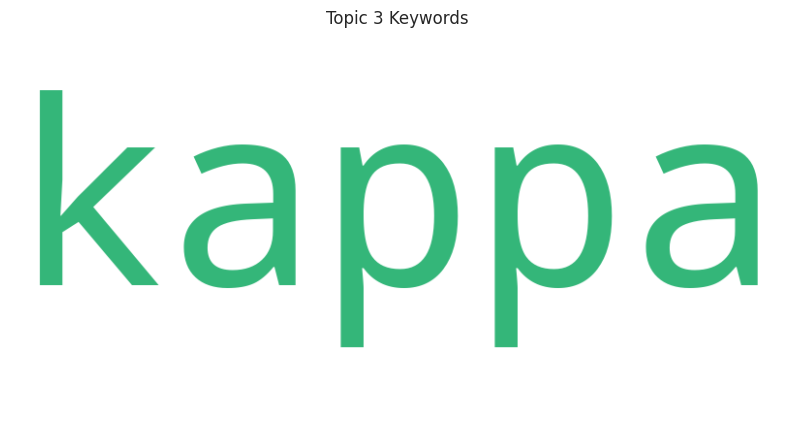

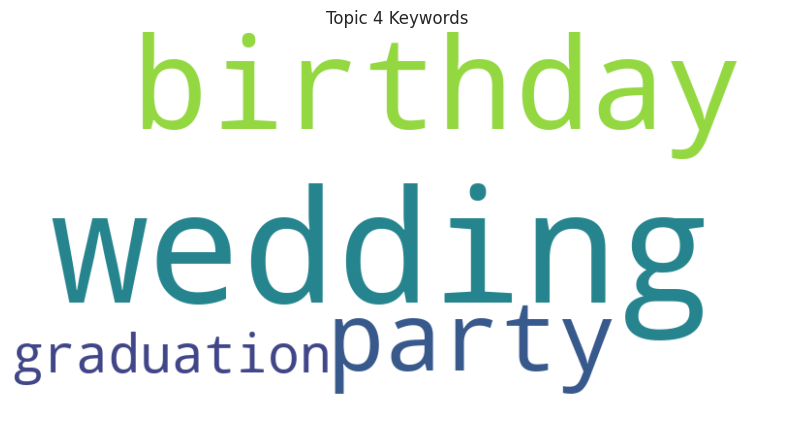

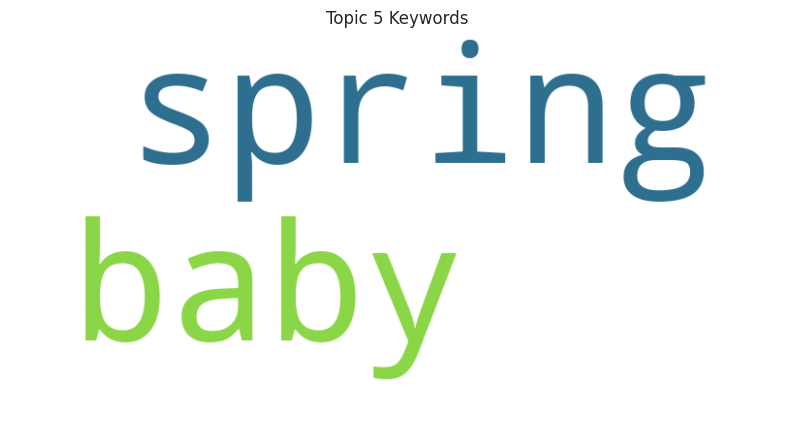

ValueError: ignored

<Figure size 1000x600 with 0 Axes>

In [106]:
for topic_idx, topic_keywords in enumerate(topic_keywords):
    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_keywords)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx} Keywords')
    plt.axis('off')
    plt.show()

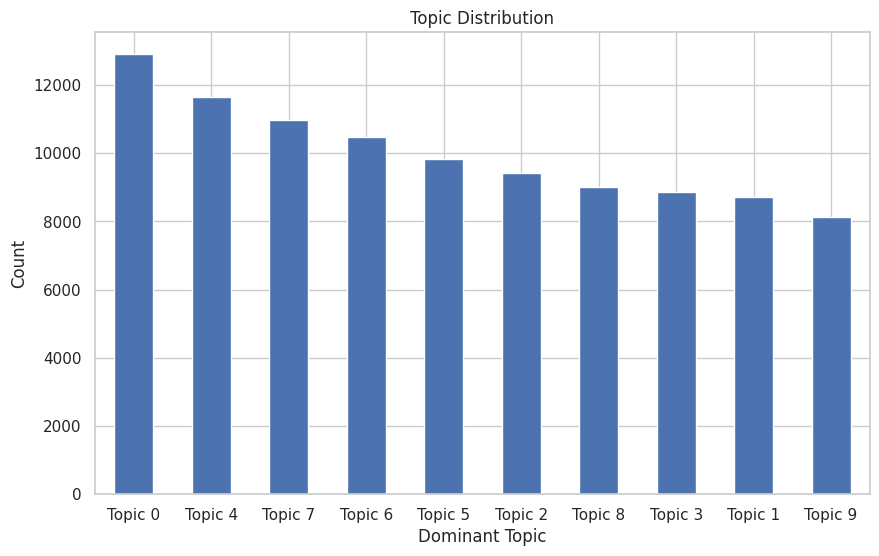

In [107]:
plt.figure(figsize=(10, 6))
topic_counts['Dominant Topic'].value_counts().plot(kind='bar')
plt.xlabel('Dominant Topic')
plt.ylabel('Count')
plt.title('Topic Distribution')
plt.xticks(rotation=0)
plt.show()

#**n gram**

In [108]:
from nltk import bigrams
from collections import Counter

In [109]:
tokenized_titles = [title.split() for title in sampled_data['title']]

bigram_list = list(bigrams([word for title in tokenized_titles for word in title]))

bigram_counts = Counter(bigram_list)

most_common_bigrams = bigram_counts.most_common(10)  

bigrams, frequencies = zip(*most_common_bigrams)

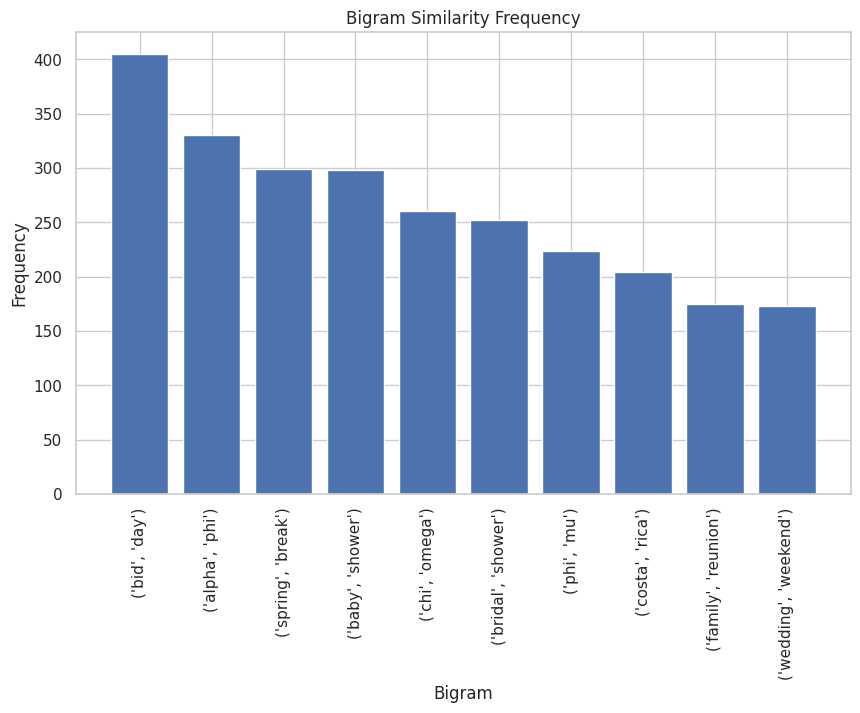

In [110]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(bigrams)), frequencies)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Bigram Similarity Frequency')
plt.xticks(range(len(bigrams)), bigrams, rotation=90)
plt.show()

In [111]:
import seaborn as sns

In [112]:
df = pd.DataFrame({'Bigram': bigrams, 'Frequency': frequencies})

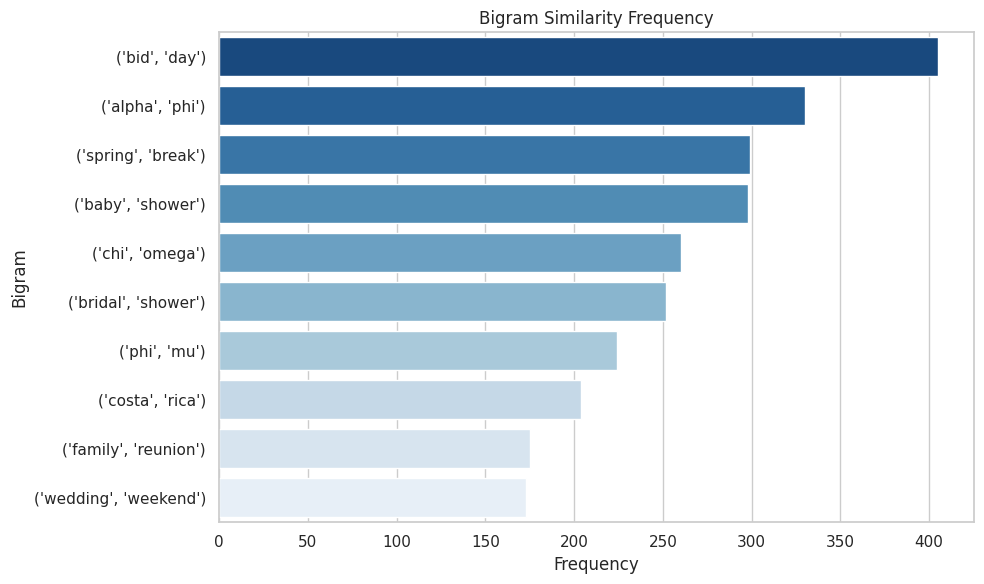

In [113]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=df, palette='Blues_r')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Bigram Similarity Frequency')
plt.tight_layout()
plt.show()

#**Word Co-occurrence**

In [114]:
import networkx as nx

In [119]:
co_occurrence_matrix = pd.DataFrame(0, index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

#**Make Interactive bigram for every 100,000 random samples**

#**This crashed**

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [ ]:
cleaned_album_names = data['title'].apply(lambda x: x.lower())  

tokenized_album_names = cleaned_album_names.str.split()

model = Word2Vec(sentences=tokenized_album_names, vector_size=100, window=5, min_count=5, workers=4)

word_embeddings = model.wv

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(word_embeddings[word_embeddings.key_to_index])

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], alpha=0.5)
for i, word in enumerate(word_embeddings.key_to_index):
    plt.annotate(word, (embeddings_tsne[i, 0], embeddings_tsne[i, 1]))
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word Embeddings Visualization')
plt.show()